In [44]:
import pandas as pd
import seaborn as sns

In [60]:
import warnings
warnings.filterwarnings('ignore')

In [6]:
df = pd.read_csv('UK_Accident.csv')
df = df.drop('Unnamed: 0', axis=1)
df = df.set_index('Accident_Index')
df.sample(5)

,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,...,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Year
Accident_Index,,,,,,,,,,,,,,,,,,,,,
2.01147E+12,572820.0,113340.0,0.456016,50.893619,47,3,1,1,18/06/2011,7,...,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,NaN,NaN,2,Yes,E01021096,2011
200532D080005,510580.0,407160.0,-0.332424,53.549425,32,3,2,1,18/11/2005,6,...,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Frost/Ice,NaN,NaN,2,Yes,E01026367,2005
201420T044424,407310.0,285000.0,-1.893846,52.462867,20,3,2,1,22/08/2014,6,...,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,NaN,NaN,1,Yes,E01009366,2014
201001JI40559,540450.0,186950.0,0.024904,51.563891,1,2,2,1,31/08/2010,3,...,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,NaN,NaN,1,Yes,E01003791,2010
200930D000081,436410.0,333980.0,-1.460142,52.902010,30,3,2,1,02/02/2009,2,...,No physical crossing within 50 meters,Daylight: Street light present,Snowing without high winds,Snow,NaN,NaN,1,No,E01013591,2009


## จำนวน rows และ columns

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1504150 entries, 0 to 1504149
Data columns (total 33 columns):
 #   Column                                       Non-Null Count    Dtype  
---  ------                                       --------------    -----  
 0   Unnamed: 0                                   1504150 non-null  int64  
 1   Accident_Index                               1504150 non-null  object 
 2   Location_Easting_OSGR                        1504049 non-null  float64
 3   Location_Northing_OSGR                       1504150 non-null  float64
 4   Longitude                                    1504049 non-null  float64
 5   Latitude                                     1504150 non-null  float64
 6   Police_Force                                 1504150 non-null  int64  
 7   Accident_Severity                            1504150 non-null  int64  
 8   Number_of_Vehicles                           1504150 non-null  int64  
 9   Number_of_Casualties                         1

## column ที่มี null

In [11]:
df.isna().sum()

Location_Easting_OSGR                              101
Location_Northing_OSGR                               0
Longitude                                          101
Latitude                                             0
Police_Force                                         0
Accident_Severity                                    0
Number_of_Vehicles                                   0
Number_of_Casualties                                 0
Date                                                 0
Day_of_Week                                          0
Time                                               117
Local_Authority_(District)                           0
Local_Authority_(Highway)                            0
1st_Road_Class                                       0
1st_Road_Number                                      0
Road_Type                                            0
Speed_limit                                          0
Junction_Control                                602835
2nd_Road_C

In [18]:
df['Junction_Control'].unique()

array([nan, 'Automatic traffic signal', 'Giveway or uncontrolled',
       'Stop Sign', 'Authorised person'], dtype=object)

In [19]:
df['Special_Conditions_at_Site'].unique()

array([nan, 'Ol or diesel', 'Roadworks',
       'Auto traffic signal partly defective', 'Road surface defective',
       'Auto traffic singal out',
       'Permanent sign or marking defective or obscured', 'Mud'],
      dtype=object)

In [20]:
df['Carriageway_Hazards'].unique()

array([nan, 'Other object in carriageway',
       'Pedestrian in carriageway (not injured)',
       'Dislodged vehicle load in carriageway',
       'Involvement with previous accident',
       'Any animal (except a ridden horse)'], dtype=object)

In [27]:
df['Road_Surface_Conditions'].fillna('Normal', inplace = True)
df['Special_Conditions_at_Site'].fillna('None', inplace = True)
df['Carriageway_Hazards'].fillna('None', inplace = True)
df['Did_Police_Officer_Attend_Scene_of_Accident'].fillna('No', inplace = True)
df['Weather_Conditions'].fillna('Unknown', inplace = True)
df['Junction_Control'].fillna('None', inplace = True)
df['Location_Easting_OSGR'].fillna(0, inplace = True)
df['Longitude'].fillna(0, inplace = True)

## วันที่เกิดอุบัติเหตุเยอะที่สุด

In [43]:
days = df.groupby('Day_of_Week')[['Number_of_Casualties']].sum()
days.sort_values(by='Number_of_Casualties', ascending=False)

,Number_of_Casualties
Day_of_Week,
6,331934
5,299044
4,297756
3,294476
7,285261
2,284043
1,239532


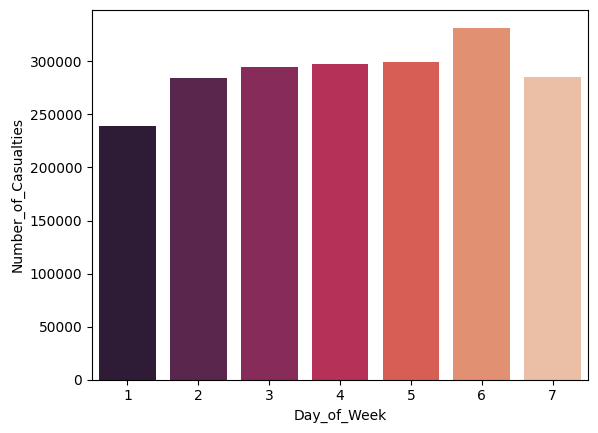

In [62]:
sns.barplot(data=days, x='Day_of_Week', y='Number_of_Casualties', palette='rocket');